**DNN MODEL USING PATEINT AND CPT DATA**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
zip_path = '/content/drive/MyDrive/adhd-diagnosis.zip'
extract_path = '/content/drive/MyDrive/extracted files'

In [ ]:
import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
## set path to the data
cpt_folder = '/content/drive/MyDrive/extracted files/CPT_II_ConnersContinuousPerformanceTest.csv'
patient_info_path = '/content/drive/MyDrive/extracted files/patient_info.csv'

In [ ]:
## reading the data
with open(patient_info_path, 'r') as f:
    for _ in range(5):
        print(f.readline())


ID;SEX;AGE;ACC;ACC_TIME;ACC_DAYS;HRV;HRV_TIME;HRV_HOURS;CPT_II;ADHD;ADD;BIPOLAR;UNIPOLAR;ANXIETY;SUBSTANCE;OTHER;CT;MDQ_POS;WURS;ASRS;MADRS;HADS_A;HADS_D;MED;MED_Antidepr;MED_Moodstab;MED_Antipsych;MED_Anxiety_Benzo;MED_Sleep;MED_Analgesics_Opioids;MED_Stimulants;filter_$

1;0;3;1;16:00:00;6;1;11:00:00;21;0;1;0;1;0;1;0;1;1;1;54;53;26;12;2;1;1;;;;;;;1

2;0;4;1;10:54:00;6.8;0;;;1;1;0;0;1;0;0;1;1;1;83;62;11;2;7;0;;;;;;;;1

3;1;2;1;15:28:00;7.2;1;15:25:00;21;1;1;0;1;0;0;1;0;0;0;72;60;6;8;0;0;;;;;;;;1

4;1;3;0;;;1;16:55:00;22;1;1;0;1;0;1;1;0;0;9;82;46;19;12;6;1;1;;;1;;1;;0



In [ ]:
import pandas as pd

patient_df = pd.read_csv(patient_info_path, delimiter=';')

# Convert 'ID' column to  PatientID in activity data files
patient_df['ID'] = patient_df['ID'].astype(str)

# Rename 'ID' column to 'PatientID'
patient_df.rename(columns={'ID': 'PatientID'}, inplace=True)


patient_df = patient_df[['PatientID', 'ADHD']]


patient_df.head()

,PatientID,ADHD
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [ ]:
## reading the data
with open(cpt_folder, 'r') as f:
    for _ in range(5):
        print(f.readline())


﻿ID;Assessment Status;Assessment Duration;Type;LastTrial;Trial1;Response1;Trial2;Response2;Trial3;Response3;Trial4;Response4;Trial5;Response5;Trial6;Response6;Trial7;Response7;Trial8;Response8;Trial9;Response9;Trial10;Response10;Trial11;Response11;Trial12;Response12;Trial13;Response13;Trial14;Response14;Trial15;Response15;Trial16;Response16;Trial17;Response17;Trial18;Response18;Trial19;Response19;Trial20;Response20;Trial21;Response21;Trial22;Response22;Trial23;Response23;Trial24;Response24;Trial25;Response25;Trial26;Response26;Trial27;Response27;Trial28;Response28;Trial29;Response29;Trial30;Response30;Trial31;Response31;Trial32;Response32;Trial33;Response33;Trial34;Response34;Trial35;Response35;Trial36;Response36;Trial37;Response37;Trial38;Response38;Trial39;Response39;Trial40;Response40;Trial41;Response41;Trial42;Response42;Trial43;Response43;Trial44;Response44;Trial45;Response45;Trial46;Response46;Trial47;Response47;Trial48;Response48;Trial49;Response49;Trial50;Response50;Trial51;Res

In [ ]:
import pandas as pd

patient_df = pd.read_csv(patient_info_path, delimiter=';')

# Convert 'ID' column to  PatientID in activity data files
patient_df['ID'] = patient_df['ID'].astype(str)
,
# Rename 'ID' column to 'PatientID'
patient_df.rename(columns={'ID': 'PatientID'}, inplace=True)


patient_df = patient_df[['PatientID', 'ADHD']]


patient_df.head()


,PatientID,ADHD
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [ ]:
import pandas as pd


activity_summary_df = pd.read_csv(cpt_folder, delimiter=';')


activity_summary_df.rename(columns={'ID': 'PatientID'}, inplace=True)
# Convert 'PatientID' to string in both DataFrames
activity_summary_df['PatientID'] = activity_summary_df['PatientID'].astype(str)
patient_df['PatientID'] = patient_df['PatientID'].astype(str)

# merge
final_df = pd.merge(activity_summary_df, patient_df, on='PatientID', how='inner')

if final_df.empty:
    print("Warning: Merged DataFrame is empty. No matching PatientIDs found.")
else:
    print(f"Merged DataFrame contains {len(final_df)} rows.")

print(final_df.head())

Merged DataFrame contains 99 rows.
  PatientID  Assessment Status  Assessment Duration  Type  LastTrial  Trial1  \
0         2                  3               839999     6        360      11   
1         3                  3               839999     6        360      12   
2         4                  3               839999     6        360      14   
3         5                  3               839999     6        360      12   
4         7                  3               839998     6        360      11   

   Response1  Trial2  Response2  Trial3  ...  Percent HitRTIsi  \
0         -1      13        469       7  ...                 0   
1         -1       0        371       2  ...                 0   
2         -1      10         -1       3  ...                 0   
3        459       7        289      12  ...                 0   
4        841       7         -1       5  ...                 0   

   General TScore HitSEIsi  Adhd TScore HitSEIsi  Neuro TScore HitSEIsi  \
0           

In [ ]:
#Split the Data

from sklearn.model_selection import train_test_split

# x & y targets
X = final_df.drop(columns=['PatientID', 'ADHD'])
y = final_df['ADHD']  # ADHD is the target variable

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 79 samples
Test set size: 20 samples


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.71      0.42      0.53        12
           1       0.46      0.75      0.57         8

    accuracy                           0.55        20
   macro avg       0.59      0.58      0.55        20
weighted avg       0.61      0.55      0.54        20



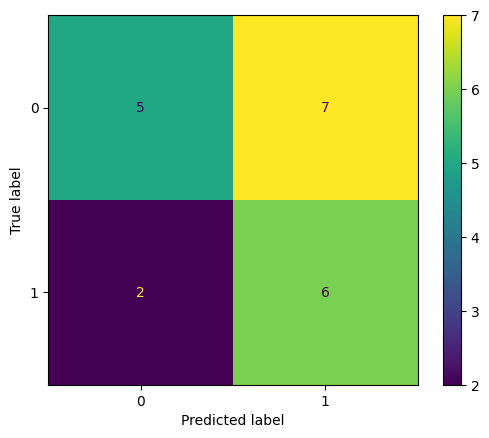

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [ ]:
#Model Training (DNN)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the DNN Model Architecture
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Train the Model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)
# Model Evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 365ms/step - accuracy: 0.4788 - loss: 0.9399 - val_accuracy: 0.4000 - val_loss: 0.8962
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.8215 - loss: 0.5089 - val_accuracy: 0.4000 - val_loss: 0.7777
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9537 - loss: 0.3134 - val_accuracy: 0.5000 - val_loss: 0.7258
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.2242 - val_accuracy: 0.5000 - val_loss: 0.7068
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.1597 - val_accuracy: 0.6000 - val_loss: 0.6973
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.1127 - val_accuracy: 0.6000 - val_loss: 0.6913
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.0866 - val_accuracy: 0.6500 - val_loss: 0.6901
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.0745 - val_accuracy: 0.6500 - val_loss: 0.6888
Epoch 9/2

In [ ]:
# Make predictions on test data
y_pred_prob = model.predict(X_test)

# Convert predictions to percentages
y_pred_percent = y_pred_prob * 100


for i, percent in enumerate(y_pred_percent):
    print(f"Sample {i+1}: {percent[0]:.2f}% chance of having ADHD")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Sample 1: 67.26% chance of having ADHD
Sample 2: 88.15% chance of having ADHD
Sample 3: 73.33% chance of having ADHD
Sample 4: 28.56% chance of having ADHD
Sample 5: 94.85% chance of having ADHD
Sample 6: 71.41% chance of having ADHD
Sample 7: 46.44% chance of having ADHD
Sample 8: 13.40% chance of having ADHD
Sample 9: 80.71% chance of having ADHD
Sample 10: 80.10% chance of having ADHD
Sample 11: 12.95% chance of having ADHD
Sample 12: 84.36% chance of having ADHD
Sample 13: 66.40% chance of having ADHD
Sample 14: 18.85% chance of having ADHD
Sample 15: 28.92% chance of having ADHD
Sample 16: 50.24% chance of having ADHD
Sample 17: 45.66% chance of having ADHD
Sample 18: 44.14% chance of having ADHD
Sample 19: 40.37% chance of having ADHD
Sample 20: 73.41% chance of having ADHD


In [ ]:
import numpy as np
import pandas as pd

def predict_from_user_input(model, scaler, feature_names, all_feature_names):
    """
    Ask the user for input values for each feature, process them,
    and predict ADHD probability using the trained model.

    Parameters:
    - model: Trained DNN model
    - scaler: Scaler used during training
    - feature_names: List of selected feature names used to train the model
    - all_feature_names: List of all features expected by the model (in same order as training)
    """
    print("Please enter the following values:\n")

    # Get user input for selected features
    user_data = []
    for feature in feature_names:
        while True:
            try:
                value = float(input(f"{feature}: "))
                user_data.append(value)
                break
            except ValueError:
                print("Please enter a valid number.")

    # Create a dictionary with the inputs
    user_data_dict = {feature: value for feature, value in zip(feature_names, user_data)}

    # Create a DataFrame with all features set to 0
    input_df = pd.DataFrame(0, index=[0], columns=all_feature_names)

    # Fill user input values
    for feature in feature_names:
        input_df.at[0, feature] = user_data_dict[feature]

    # Scale the input
    scaled_input = scaler.transform(input_df)

    # Make prediction
    prediction = model.predict(scaled_input)[0][0]

    # Display result
    print(f"\n🧠 ADHD Possibility: {prediction * 100:.2f}%")
    return prediction


In [ ]:
# Get feature names from the original DataFrame before scaling
all_features = final_df.drop(columns=['PatientID', 'ADHD']).columns.tolist()

# Now you can use all_features in your function
predict_from_user_input(model, scaler, selected_features, all_features)

Please enter the following values:

Assessment Duration: 450000
LastTrial: 100
Trial1: 5
Response1: 100
Adhd Confidence Index: 33
Neuro Confidence Index: 29
General TScore HitSEIsi: 55
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

🧠 ADHD Possibility: 0.00%


np.float32(0.0)